# Did Russia win the 2016 US elections ?

## 1. Introduction

On November 8th of 2016, the republican candidate Donald Trump becomes the 45th president of the USA. This does not correspond at all with all the opinions surveys made during the campaign, as according to them, it was supposed that Hillary Clinton win the elections. How could it possibly happen ?

Social media platforms have taken a great importance in our modern society. Social networks such as Facebook, Twitter or LinkedIn have become very powerful tools to spread a message. They allow a direct connection between parties or companies and citizens, and recent events such as the Arab Spring have shown they can be used as a driving force. However, in such media which favor free expression, the control is weak or inexistant and thus fake information can spread quickly, against the social good.

In order to see the impact social media can have on important social questions (such as US elections=, we chose the 3 Million Russian Troll Tweets dataset. This dataset contains tweets from the IRA (Internet Research Agency), which is a Russian company specialized in online propaganda to serve Russian interests. They notably ran a sophisticated and coordinated campaign to interfere in the 2016 US elections, supposedly to advocate against the democrat candidate Hillary Clinton. Our aim here is to to analyze Russia’s interference in these elections.

In order to analyze the influence of Russia, we will go through different aspects. First, we will describe some main politics-related events that happened during the election. Secondly, we will describe the dataset, and show how we keep the relevent features. Then in a third time, we will try to analyze as much as possible the dataset, by showing the evolution of the main politic-related events, and analyze the proportion of tweet that have been posted against Trump's administration, and Clinton's administration.

## 2. Main politics-related events during the elections
During the US elections, many major events happened. 

### 2.1. Hillary Clinton's scandale :

The first one, is the scandal about **Hillary Clinton's email**. Hillary Clinton used a private server to access her emails when she was Secretary of State. But FBI's chief (James Comey) announces 11 days before the elections, that new emails have been found. Donald Trump won't forget to use it in order to discredit the democrat candidate.

The second one is about **Hillary's malaise**. On 11th septembre, at the commemoration ceremony, Hillary Clinton is forced to leave as she is not feeling good. A pneumonia is diagnosed. As Trump keep saying that somebody has to be strong to govern the state, he keep saying that Hillary Clinton is not strong enough to govern the USA.

The third scandale happens when Hillary Clinton treats half of Trump's elector as pathetic people. As a revenge, Trump's try to attract some sympathy of everybody by ...

The last one is the **pizzagate conspiracy theory**. Indeed, on 30th of October 2016, a tweet appears on twitter saying that there exists a pedophilia network around John Podesta, Hillary Clinton's compaign director. These tweets got quickly viral, and the hashtag Pizzagate appeared on November 7th on twitter (one day before the elections).

### 2.2. Donald Trump's scandale :

The first one is about a **2005 tape published by the Washington Post**. Donald Trump say sexist, and degrading words about women. This lead to some of his voters finally left his side.

The second one is about **Donald Trump's taxes**. On begininning of October, the New York Times reveals that Donald Trump may have declared in a doubtful way the bankruptcy of his casino, which may have help to pay less taxes. Hillary Clinton won't forget to make comment about it and attacking about the fact that he may have paid nothing to support schools, or veterans.

The last one happened when Donald Trump say disrespectful word about the father's of the army's captain, died in Irak in 2004. The public opinion has been disappointed about this event, which leads to many Republican to attack him.

### 2.3. References
https://www.rtl.fr/actu/international/presidentielle-americaine-2016-les-6-rebondissements-de-la-campagne-7785551696 <br/>
https://en.wikipedia.org/wiki/Pizzagate_conspiracy_theory <br/>

## 3. Import needed for the project

In [1]:
import pandas as pd 
import glob
import os
import numpy as np
import numpy.matlib
import datetime
import re
import matplotlib.pyplot as plt

PATH_DATA = "../data"

## 4. Dataset description

The datasets are available at the follwing URL :
* https://www.kaggle.com/fivethirtyeight/russian-troll-tweets : Dataset used at the beginning. Mainly used for development.
* https://drive.google.com/open?id=1GBsVXYvPrGcYI-wR4mWGO39fly1TMqjO : Bigger datasets which is entirely dedicated to the US elections, and allow much more meaningful results.
* https://www.kaggle.com/fivethirtyeight/2016-election-polls/home : Dataset corresponding to a voter survey between November 2015 and November 2016. We are not sure to use it for the moment.

### 4.1. Small dataset from kaggle

#### 4.1.1. Loading the dataset

In [4]:
filenames = glob.glob(os.path.join(PATH_DATA, "IRAhandle_tweets_*.csv"))
kaggle_df = pd.concat((pd.read_csv(f) for f in filenames))
print('*'*66)
print('The shape of the whole dataframe is the following : {}'.format(kaggle_df.shape))
print('*'*66)
kaggle_df.head()

******************************************************************
The shape of the whole dataframe is the following : (2973371, 15)
******************************************************************


,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll


### 4.1.2. Description of the dataset

#### 4.1.2.1 Small dataset from kaggle

The IRAhandle_tweets dataset, is the given dataset collected by the Internet Research Agency.

The dataset has different columns :

* `external_author_id` : Account id of the tweet publisher
* `author` : Name of the author of the tweet
* `content` : The text of the tweet
* `region` : Region classification
* `language` : The language of the tweet
* `publish_date` : The date and time when the tweet was published
* `harvested_date` : The date and time the tweet was collected by Social Studio
* `following` : The number of accounts the author was following (when he published the tweet)
* `followers` : The number of people following the author was following (when he published the tweet)
* `updates` : The number of “update actions” on the account that authored the tweet, including tweets, retweets and likes
* `post_type` : Indicator if the tweet is a quote tweet or a retweet
* `account_type` : Specific account theme, as coded by Linvill and Warren
* `retweet` : Indicator (binary) if the tweet is a retweet or not
* `account_category` : General account theme, as coded by Linvill and Warren
* `new_june_2018` : A binary indicator of whether the author was newly listed in June 2018

In [5]:
kaggle_df.dtypes

external_author_id    float64
author                 object
content                object
region                 object
language               object
publish_date           object
harvested_date         object
following               int64
followers               int64
updates                 int64
post_type              object
account_type           object
new_june_2018           int64
retweet                 int64
account_category       object
dtype: object

##### 4.1.2.1.1 Proportion of quote tweet per region/language/account category

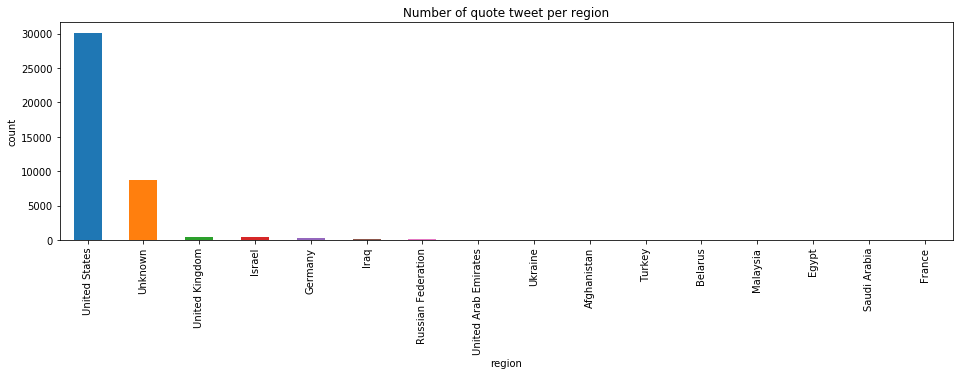

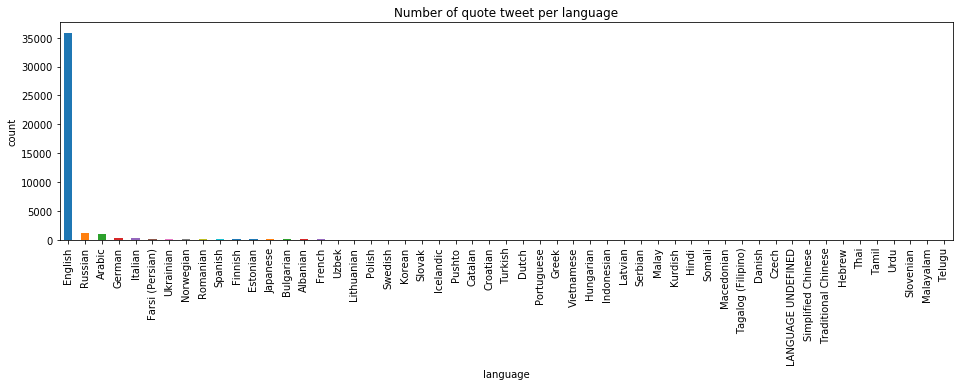

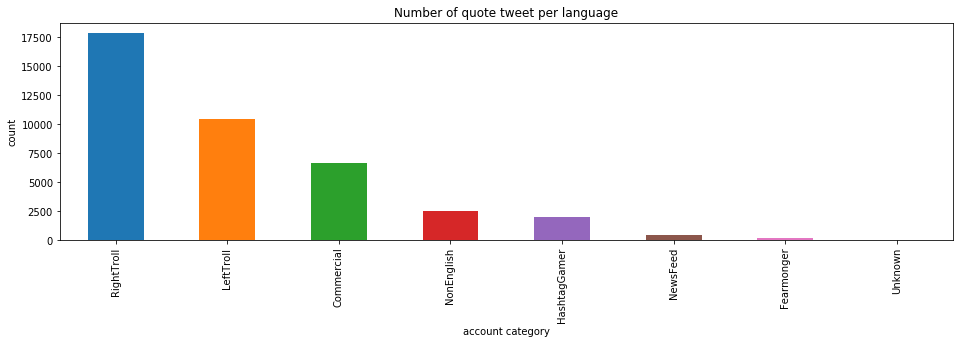

In [7]:
# Select only the quote tweet
quote_tweet_df = kaggle_df.loc[kaggle_df['post_type'] == 'QUOTE_TWEET']

# Plot the number of quote tweet per region
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = quote_tweet_df['region'].value_counts().plot.bar()
ax.set_xlabel('region')
ax.set_ylabel('count')
ax.set_title('Number of quote tweet per region')

# Plot the number of quote tweet per language
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = quote_tweet_df['language'].value_counts().plot.bar()
ax.set_xlabel('language')
ax.set_ylabel('count')
ax.set_title('Number of quote tweet per language')

# Plot the number of quote tweet per account category
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = quote_tweet_df['account_category'].value_counts().plot.bar()
ax.set_xlabel('account category')
ax.set_ylabel('count')
ax.set_title('Number of quote tweet per language')

plt.show()

##### 4.1.2.1.2 Proportion of all tweets (including the retweet) per region/language

In order to see the proportion of tweet corresponding to different features, and to see how we will use the dataset, we will first see how many tweets per region, language and hashtags category have been posted.

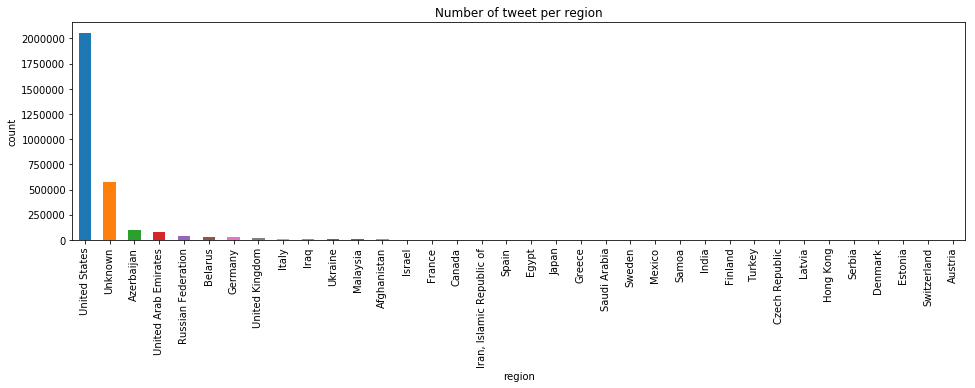

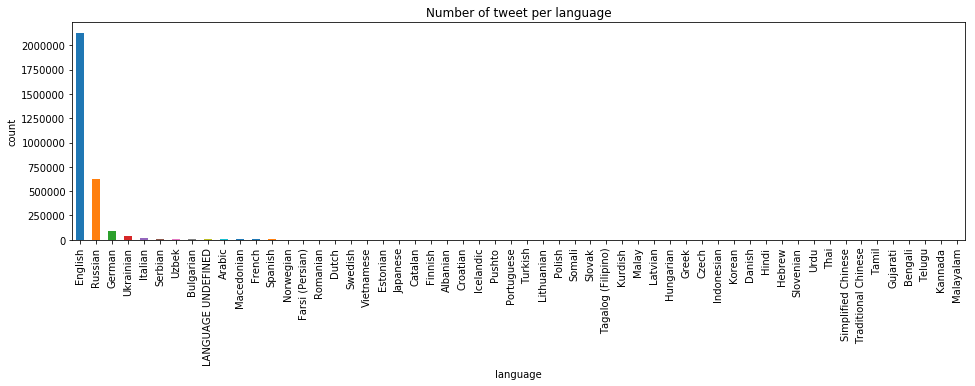

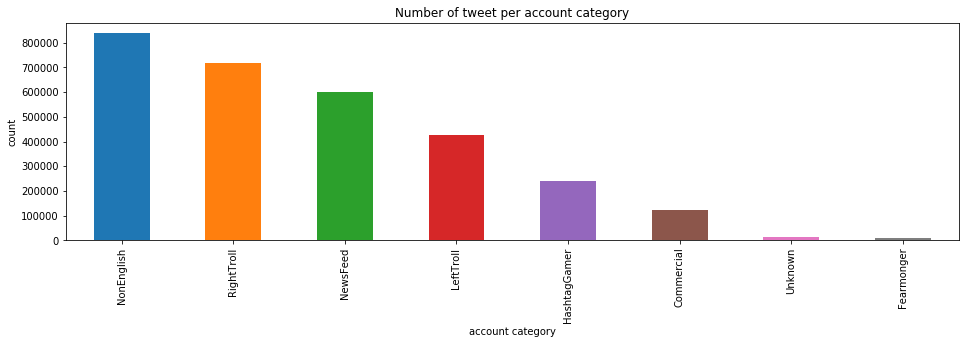

In [19]:
# Plot the number of tweet per region
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = kaggle_df['region'].value_counts().plot.bar()
ax.set_xlabel('region')
ax.set_ylabel('count')
ax.set_title('Number of tweet per region')

# Plot the number of tweet per language
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = kaggle_df['language'].value_counts().plot.bar()
ax.set_xlabel('language')
ax.set_ylabel('count')
ax.set_title('Number of tweet per language')

# Plot the number of tweet per account category
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = kaggle_df['account_category'].value_counts().plot.bar()
ax.set_xlabel('account category')
ax.set_ylabel('count')
ax.set_title('Number of tweet per account category')

plt.show()

In this dataset, we can see that most of the tweets come from the US, and are published in english. This means, that we will keep at least ~200000 tweets for our analysis using this dataset. The main advantage of this dataset, is the classification made by Linvill and Warren, indicating us if the tweet corresponds to a right troll or a left troll (which is very useful in our analysis).

#### 4.1.2.1.3 NaN and unique values for each column of the dataset

To see how to clean this dataset, we first have to see what each column contains (values, number of unknown values, Nan or null values).

In [23]:
# Region
print('*'*70+'\nRegion description : \n')
print('The different regions are : \n {}'.format(kaggle_df['region'].unique()))
N_null = kaggle_df['region'].isnull().sum()
percentage = float(N_null)/float(kaggle_df.shape[0])
print('\nThe number of null values is : {} ({} %)'.format(N_null, 100*percentage))
N_null = kaggle_df[kaggle_df['region'] == 'Unknown'].shape[0]
percentage = float(N_null)/float(kaggle_df.shape[0])
print('The number of unknown values is : {} ({} %)'.format(N_null, 100*percentage))
N_us = kaggle_df[kaggle_df['region'] == 'United States'].shape[0]
print('Number of tweets from US : {} ({} %) of the dataset'.format(N_us, 100*\
                                                           float(N_us)/float(kaggle_df.shape[0])))

# Language
print('*'*70+'\nLanguage description : \n')
print('The different languages are : \n {}'.format(kaggle_df['language'].unique()))
N_null = kaggle_df[kaggle_df['language'] == 'LANGUAGE UNDEFINED'].shape[0]
percentage = float(N_null)/float(kaggle_df.shape[0])
print('\nThe number of LANGUAGE UNDEFINED is : {} ({} %)'.format(N_null, 100*percentage))
N_english = kaggle_df[kaggle_df['language'] == 'English'].shape[0]
print('Number of english tweets : {} ({} %) of the dataset'.format(N_english, 100*\
                                                           float(N_english)/float(kaggle_df.shape[0])))

# Post type
print('*'*70+'\nPost type description : \n')
print('The different post types are : \n {}'.format(kaggle_df['post_type'].unique()))
N_null = kaggle_df['post_type'].isnull().sum()
percentage = float(N_null)/float(kaggle_df.shape[0])
print('\nThe number of null values is : {} ({} %)'.format(N_null, 100*percentage))

# Account type
print('*'*70+'\nAccount type description : \n')
print('The different account types are : \n {}'.format(kaggle_df['account_type'].unique()))
N_null = kaggle_df['account_type'].isnull().sum()
percentage = float(N_null)/float(kaggle_df.shape[0])
print('\nThe number of null values is : {} ({} %)'.format(N_null, 100*percentage))
N_null = kaggle_df[kaggle_df['account_type'] == '?'].shape[0]
percentage = float(N_null)/float(kaggle_df.shape[0])
print('The number of ? is : {} ({} %)'.format(N_null, 100*percentage))

# Account category
print('*'*70+'\nAccount category description : \n')
print('The different account categories are : \n {}'.format(kaggle_df['account_category'].unique()))
N_null = kaggle_df[kaggle_df['account_category'] == 'Unknown'].shape[0]
percentage = float(N_null)/float(kaggle_df.shape[0])
print('The number of unknown values is : {} ({} %)'.format(N_null, 100*percentage))

# Retweet
print('*'*70+'\nRetweet description : \n')
print('The different values for retweet are : \n {}'.format(kaggle_df['retweet'].unique()))
N_null = kaggle_df['retweet'].isnull().sum()
percentage = float(N_null)/float(kaggle_df.shape[0])
print('The number of null values is : {} ({} %)'.format(N_null, 100*percentage))

# Dates
print('*'*70+'\nDates description : \n')
print('The minimum date in the dataset is {}'.format(kaggle_df['publish_date'].min()))
print('The maximum date in the dataset is {}'.format(kaggle_df['publish_date'].max()))
N_null = kaggle_df['publish_date'].isnull().sum()
percentage = float(N_null)/float(kaggle_df.shape[0])
print('\nThe number of null date values is : {} ({} %)'.format(N_null, 100*percentage))

print('*'*70)

**********************************************************************
Region description : 

The different regions are : 
 ['Unknown' nan 'United States' 'Italy' 'United Arab Emirates' 'Japan'
 'Israel' 'Azerbaijan' 'Egypt' 'United Kingdom' 'Russian Federation'
 'Turkey' 'Iraq' 'Germany' 'France' 'Ukraine' 'Serbia' 'Hong Kong'
 'Austria' 'Belarus' 'Malaysia' 'Spain' 'Samoa' 'India' 'Afghanistan'
 'Saudi Arabia' 'Iran, Islamic Republic of' 'Mexico' 'Canada' 'Greece'
 'Czech Republic' 'Finland' 'Latvia' 'Estonia' 'Sweden' 'Denmark'
 'Switzerland']

The number of null values is : 8843 (0.29740654630720487 %)
The number of unknown values is : 572767 (19.263220095978607 %)
Number of tweets from US : 2055882 (69.14313753648636 %) of the dataset
**********************************************************************
Language description : 

The different languages are : 
 ['English' 'Russian' 'Serbian' 'Ukrainian' 'Tagalog (Filipino)' 'Albanian'
 'Italian' 'Romanian' 'Spanish' 'Catalan' 'Germ

When reading the results above, we can see that if we only keep the interesting language (english), we will only keep 71.6 % of the dataset, which corresponds to about 210000 tweets. We can see (given the analysis of the columns) that a cleaning is not necessary, as all the columns have almost no null values. The only problem can come from the post_type column, but as the column 'retweet' gives us enough informations about the post_type, the only thing to do is to modify the post_type column according to the column 'retweet'.

### 4.2. Dataset from tweeter

#### 4.2.1. Loading the dataset

The rus_troll_tweets dataset, is a subsample (1%) of the total tweets that have been posted by russian account during the elections (till now).

The dataset has different files :

`rus_troll_user.csv` : Contains the user features (nickname, description field, follower count, ...) <br/>
`rus_troll_tweet_text.csv`: Contains the text, and language of each tweet. This is the one we will use to analyse some recurrent text apparition, etc <br/>
`rus_troll_tweet_metadata.csv`: Contains features that are user specific for each tweet <br/>
`rus_troll_tweet_stats.csv`: Contains other tweet features (retweet number, quoted number, ...) <br/>

The column that can appear in each file are descripted below :
* `tweetid` : the id of the tweet (for identification purpose)
* `userid` : the id of the user
* `user_display_name` : the name of the user (encoded for anonymized users)
* `user_screen_name` : Twitter name of the user (encoded for anonymized users)
* `user_reported_location` : location of the user (self-reported) (at the moment of the tweet)
* `user_profile description` : description of the user's profile (at the moment of the tweet)
* `user_profile_url` : Profil URL of the user (at the moment of the tweet)
* `follower_count` : Number of people following the author (at the moment of the tweet)
* `following_count` : Number of people the author is following (at the moment of the tweet)
* `account_creation_date` : time and date of the account creation
* `account_language` : language of the account (chosen by the user)
* `tweet_language` : language of the tweet
* `tweet_text` : content of the tweet (mentions to anonymized accounts have been replaced with anonymized userid)
* `tweet_time` : time when the tweet was published
* `tweet_client_name` : name of the client app used to publish the tweet
* `in_reply_to_tweetid` : the tweetid of the original tweet (if the tweet is reply to another one) (only for replies)
* `in_reply_to_userid` : the userid of the original tweet (if the tweet is reply to another one) (only for replies)
* `quoted_tweet_tweetid` : tweetid of the original tweet (if the tweet is a quote of another one) (only for quotes)
* `is_retweet` : indicates if the tweet is a retweet or not (binary)
* `retweet_userid` : userid who published the original tweet (retweets only)
* `retweet_tweetid` : tweetid of the original tweet (retweets only)
* `latitude` : geo-located latitude (if available)
* `longitude` : geo-located longitude (if available)
* `quote_count` : number of tweets quoting the tweet
* `reply_count` : number of tweets replying to the tweet
* `like_count` : number of like of the tweet
* `retweet_count` : number of retweet of the tweet
* `hashtags` : list of hashtags contained in the tweet
* `urls` : list of urls contained in the tweet
* `user_mentions` : list of userid mentionned in the tweet (anonymized included)
* `poll_choices` : poll choices (if the tweet includes a poll)

In [2]:
user_df = pd.read_csv(PATH_DATA + '/rus_troll_user.csv')
metadata_df = pd.read_csv(PATH_DATA + '/rus_troll_tweet_metadata.csv')
stats_df = pd.read_csv(PATH_DATA + '/rus_troll_tweet_stats.csv')
text_df = pd.read_csv(PATH_DATA + '/rus_troll_tweet_text.csv')

print('*'*66)
print('The shape of the user dataframe is : {}'.format(user_df.shape))
print('The shape of the metadata dataframe is : {}'.format(metadata_df.shape))
print('The shape of the stats dataframe is : {}'.format(stats_df.shape))
print('The shape of the text dataframe is : {}'.format(text_df.shape))
print('*'*66)

C:\Users\LioQuik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


******************************************************************
The shape of the user dataframe is : (3667, 11)
The shape of the metadata dataframe is : (9041308, 6)
The shape of the stats dataframe is : (9041308, 17)
The shape of the text dataframe is : (9041308, 3)
******************************************************************


#### 4.2.2. Dataset description
To understand what fields are contained in each csv files, and what files we may need, we can first plot the columns of each dataframe :

In [3]:
# user
print('*'*70+'\nuser dataframe : \n')
print('The fields for user dataframe are : \n{}'.format(user_df.columns.tolist()))

# metadata
print('*'*70+'\nmetadata dataframe : \n')
print('The fields for metadata dataframe are : \n{}'.format(metadata_df.columns.tolist()))

# stats
print('*'*70+'\nstats dataframe : \n')
print('The fields for stats dataframe are : \n{}'.format(stats_df.columns.tolist()))

# text
print('*'*70+'\ntext dataframe : \n')
print('The fields for text dataframe are : \n{}'.format(text_df.columns.tolist()))

# number of tweets
print('*'*70)
print('\nThe number of tweets are for : \nmetadata: {} \nstats: {} \ntext: {}'.\
      format(metadata_df.shape[0],stats_df.shape[0],text_df.shape[0]))

print('*'*70)

**********************************************************************
user dataframe : 

The fields for user dataframe are : 
['userid', 'user_display_name', 'user_screen_name', 'user_reported_location', 'user_profile_description', 'user_profile_url', 'account_creation_date', 'account_language', 'follower_count', 'following_count', 'last_tweet_at']
**********************************************************************
metadata dataframe : 

The fields for metadata dataframe are : 
['tweetid', 'follower_count', 'following_count', 'latitude', 'longitude', 'tweet_client_name']
**********************************************************************
stats dataframe : 

The fields for stats dataframe are : 
['tweetid', 'userid', 'tweet_time', 'in_reply_to_tweetid', 'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet', 'retweet_userid', 'retweet_tweetid', 'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags', 'urls', 'user_mentions', 'poll_choices']
*******************

We can see here that we have a total of about 9M of tweets for a total of about 4k of users, and given the columns of each dataframe, we can choose the columns we want to keep for our analysis.

For the stats dataframe :
* `tweetid`
* `userid`
* `tweet_time`
* `in_reply_to_tweetid`
* `in_reply_to_userid`
* `quoted_tweet_tweetid`
* `is_retweet`
* `retweet_userid`
* `retweet_tweetid`
* `quote_count`
* `reply_count`
* `like_count`
* `retweet_count`
* `hashtags`

For the text dataframe :
* `tweetid`
* `twee_language`
* `tweet_text`

For the metadata dataframe :
* `tweetid`
* `follower_count`
* `following_count`
* `latitude`
* `longitude`

As for the moment, our analysis in not based on the users, we don't need the user dataframe. But depending on the future features we might need, it is possible that we finally use this dataframe.

##### 4.2.2.1 Proportion of tweet per language

***************************************************************************
Number of tweet in english : 3261931 (36.07808737408349 % of the dataset)
***************************************************************************


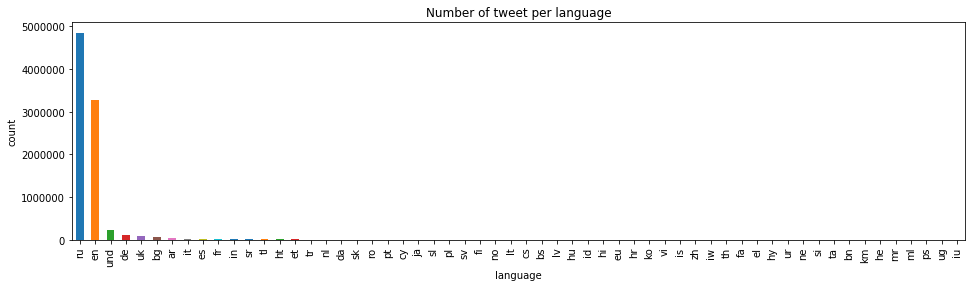

In [4]:
# Plot the number of quote tweet per language
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
ax = text_df['tweet_language'].value_counts().plot.bar()
ax.set_xlabel('language')
ax.set_ylabel('count')
ax.set_title('Number of tweet per language')

# number of tweets
N_english = text_df[text_df['tweet_language'] == 'en'].shape[0]
print('*'*75)
print('Number of tweet in english : {} ({} % of the dataset)'.format(N_english, 100*\
                                                     float(N_english)/float(text_df['tweet_language'].shape[0])))

print('*'*75)

plt.show()

##### 4.2.2.2 Proportion of quote tweet, reply, retweet and requote
First, as we want to study only english tweets, we will directly selecting the english tweets from the dataframes and keeping only the features we want, as it will help us to gain in space for computations later.

In [22]:
text_df = pd.read_csv(PATH_DATA + '/rus_troll_tweet_text.csv')
text_df = text_df.loc[text_df['tweet_language'] == 'en']
stats_df = pd.read_csv(PATH_DATA + '/rus_troll_tweet_stats.csv', usecols = ['tweetid', 'userid', 'tweet_time', 
        'in_reply_to_tweetid', 'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet', 'retweet_userid', 
        'retweet_tweetid', 'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags'])
dataset = text_df.merge(stats_df,how = 'inner', on = 'tweetid')
metadata_df = pd.read_csv(PATH_DATA + '/rus_troll_tweet_metadata.csv', usecols =['tweetid', 'follower_count', 
         'following_count', 'latitude', 'longitude'])
dataset = dataset.merge(metadata_df,how = 'inner', on = 'tweetid')

dataset.head()

,tweetid,tweet_language,tweet_text,userid,tweet_time,in_reply_to_tweetid,in_reply_to_userid,quoted_tweet_tweetid,is_retweet,retweet_userid,retweet_tweetid,quote_count,reply_count,like_count,retweet_count,hashtags,follower_count,following_count,latitude,longitude
0,567357519547207680,en,"As sun and cloud give way to moon and shadow, ...",2b0d7525bed1df5119b7956f9be4888b45686172d68006...,2015-02-16 16:19,NaN,NaN,NaN,False,NaN,NaN,0,0,0,0,NaN,696,863,NaN,NaN
1,493894187079974912,en,"Down in the comfort of strangers, I...",be1e8e099e93fe0964c1184173f038c7413def3baf38ef...,2014-07-28 23:02,NaN,NaN,NaN,False,NaN,NaN,0,0,0,0,NaN,103,218,NaN,NaN
2,493688319902220288,en,Im laughing more than i should #USA,be1e8e099e93fe0964c1184173f038c7413def3baf38ef...,2014-07-28 09:24,NaN,NaN,NaN,False,NaN,NaN,0,0,0,0,[USA],103,218,NaN,NaN
3,497543470211678209,en,"No, I'm not saying I'm sorry",be1e8e099e93fe0964c1184173f038c7413def3baf38ef...,2014-08-08 00:43,NaN,NaN,NaN,False,NaN,NaN,0,0,0,0,NaN,103,218,NaN,NaN
4,500956712657223680,en,Laugh it all off in your face,004c1875a5f3a8ddfd2044b857a81c5d458882ac5cdf67...,2014-08-17 10:46,NaN,NaN,NaN,False,NaN,NaN,0,0,0,0,NaN,63,77,NaN,NaN


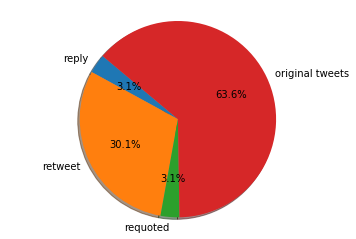

In [27]:
dataset['tweet_type'] = 'original'
reply_index = (dataset['in_reply_to_tweetid'].notnull()) | (dataset['in_reply_to_userid'].notnull())
retweet_index = (dataset['is_retweet'] == True) & (dataset['quoted_tweet_tweetid'].isnull())
requoted_index = (dataset['is_retweet'] == True) & (dataset['quoted_tweet_tweetid'].notnull())
dataset.loc[reply_index,'tweet_type'] = 'reply'
dataset.loc[retweet_index ,'tweet_type'] = 'retweet'
dataset.loc[requoted_index,'tweet_type'] = 'requoted'
plt.pie([reply_index.sum(),retweet_index.sum(),requoted_index.sum(),(dataset['tweet_type'] == 'original').sum()],
        labels=['reply','retweet','requoted','original tweets'],autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

##### 4.2.2.3 Number of tweets in function of time

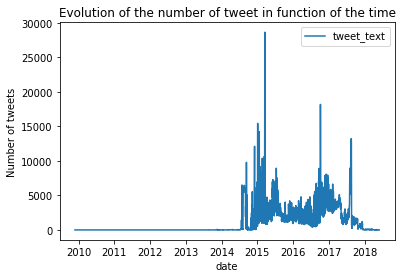

In [88]:
dataset['date'] = pd.to_datetime(dataset['tweet_time'], format='%Y-%m-%d %H:%M').dt.date

ax = dataset[['date', 'tweet_text']].groupby('date').count().plot()
ax.set_ylabel('Number of tweets')
ax.set_title('Evolution of the number of tweet in function of the time')
plt.show()

As we can see, there are three main peaks on the number of tweets in this dataset. One in the early 2015 which maybe corresponds with the beginning of the elections, and the second one (late 2016) maybe corresponds to the final round of the elections. The third one maybe comes from later scandale that may have appeared after the elections (mid-2018)

##### 4.2.2.4  NaN and unique values for each column of the dataset

In [23]:
for feature in dataset.columns:
    print(70*'*'+'\nFor the feature : %s' %(feature ))
    N_null = dataset[feature].isnull().sum()
    percentage = float(N_null)/float(dataset.shape[0])
    print('The number of null values is : {} ({} %)'.format(N_null, 100*percentage))
print(70*'*')

**********************************************************************
For the feature : tweetid
The number of null values is : 0 (0.0 %)
**********************************************************************
For the feature : tweet_language
The number of null values is : 0 (0.0 %)
**********************************************************************
For the feature : tweet_text
The number of null values is : 0 (0.0 %)
**********************************************************************
For the feature : userid
The number of null values is : 0 (0.0 %)
**********************************************************************
For the feature : tweet_time
The number of null values is : 0 (0.0 %)
**********************************************************************
For the feature : in_reply_to_tweetid
The number of null values is : 3192684 (97.87711634611523 %)
**********************************************************************
For the feature : in_reply_to_userid
The number of null v

As we can see here, most of the features don't have null values. The only ones that may have null values are : `in_reply_to_tweetid`, `in_reply_to_userid`, `quoted_tweet_tweetid`, `retweet_userid`, `retweet_tweetid`, `hashtags`, `latitude` and `longitude`.

For `hashtags`, some tweets can simply not contain any hashtags. But as our analysis will taking into account the text of the tweet, it is not a problem. `latitude` and `longitude` fields are not always available, which explains why they are almost always null. This means, that our analysis won't be axed on the regions of the tweets given by these two features.

For all the other one, it is normal that they are sometimes null, as they are only available if the tweet is a retweet, a reply, or a quote.

### 4.3 Voters survey

In this dataset, there are 27 different features, but we will keep only the following :
* `state` : state where the poll has been made
* `startdate` : start date of the poll
* `enddate` : end date of the poll
* `samplesize` : number of people that have been questionned
* `poll_wt` : weight of the poll
* `rawpoll_clinton` : raw poll of results for clinton
* `rawpoll_trump` : raw poll of results for trump
* `rawpoll_johnson` : raw poll of results for johnson
* `adjpoll_clinton` : adjusted poll of results for clinton (weighted with the whole population of the state)
* `adjpoll_trump` : adjusted poll of results for trump (weighted with the whole population of the state)
* `adjpoll_johnson` : adjusted poll of results for johnson (weighted with the whole population of the state)

Here we don't keep the results for mcmullin, as almost all the values are not defined.

In [70]:
voter_df = pd.read_csv(PATH_DATA + '/presidential_polls.csv', usecols=['state', 'startdate', 'enddate', 'samplesize', 
           'poll_wt', 'rawpoll_clinton', 'rawpoll_trump', 'rawpoll_johnson',
           'adjpoll_clinton', 'adjpoll_trump', 'adjpoll_johnson'])

print('*'*66)
print('The shape of the voter dataframe is the following : {}'.format(voter_df.shape))
print('*'*66)

voter_df.head()

******************************************************************
The shape of the voter dataframe is the following : (10236, 11)
******************************************************************


,state,startdate,enddate,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,adjpoll_clinton,adjpoll_trump,adjpoll_johnson
0,U.S.,10/25/2016,10/31/2016,24316.0,6.139129,37.69,35.07,6.18,42.64140,40.86509,5.675099
1,U.S.,10/27/2016,10/30/2016,1128.0,4.197292,45.00,46.00,3.00,43.29659,44.72984,3.401513
2,Virginia,10/27/2016,10/30/2016,1024.0,3.876856,48.00,42.00,6.00,46.29779,40.72604,6.401513
3,Florida,10/20/2016,10/24/2016,1251.0,3.403096,48.00,45.00,2.00,46.35931,45.30585,1.777730
4,U.S.,10/20/2016,10/25/2016,2120.0,3.394646,46.00,40.00,6.00,45.32744,42.20888,3.618320


#### 4.3.1 Dataset description
To describe the dataset, we will first look for all the nan or null values.

In [71]:
for col in voter_df.columns:
    print(70*'*'+'\nFor column : %s' %(col ))
    N_null = voter_df[col].isnull().sum()
    percentage = float(N_null)/float(voter_df.shape[0])
    print('The number of null values is : {} ({} %)'.format(N_null, 100*percentage))
print(70*'*')

**********************************************************************
For column : state
The number of null values is : 0 (0.0 %)
**********************************************************************
For column : startdate
The number of null values is : 0 (0.0 %)
**********************************************************************
For column : enddate
The number of null values is : 0 (0.0 %)
**********************************************************************
For column : samplesize
The number of null values is : 3 (0.029308323563892142 %)
**********************************************************************
For column : poll_wt
The number of null values is : 0 (0.0 %)
**********************************************************************
For column : rawpoll_clinton
The number of null values is : 0 (0.0 %)
**********************************************************************
For column : rawpoll_trump
The number of null values is : 0 (0.0 %)
***********************************

For `samplesize` feature, we can see below that the only threes values are null. We won't remove these samples, as we may be more interested into results that are coresponding to the general vote (state = us).

The other possible null values are for the column `rawpoll_johnson`, `adjpoll_johnson` which corresponds to the moment where only the two remaining candidates were selected (Trump and Clinton). This is why, we may work with these columns at the beginning of the campaign (to see if the influence of the tweet may have made more people vote for johnson istead of Trump or Clinton).

In [100]:
voter_df[voter_df['samplesize'].isnull()]

,state,startdate,enddate,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,adjpoll_clinton,adjpoll_trump,adjpoll_johnson
1284,U.S.,7/11/2016,7/12/2016,NaN,0.029780,46.4,32.5,5.2,49.28047,35.69393,2.286038
4878,U.S.,7/11/2016,7/12/2016,NaN,0.017206,46.4,32.5,5.2,49.27000,35.93928,2.335123
8109,U.S.,7/11/2016,7/12/2016,NaN,0.029780,46.4,32.5,5.2,49.28476,35.72319,2.313945


In [101]:
voter_us_df.head()

,state,startdate,enddate,samplesize,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,date
0,U.S.,10/25/2016,10/31/2016,24316.0,6.139129,37.69,35.07,6.18,42.64140,40.86509,5.675099,2016-10-25
1,U.S.,10/27/2016,10/30/2016,1128.0,4.197292,45.00,46.00,3.00,43.29659,44.72984,3.401513,2016-10-27
2,U.S.,10/27/2016,10/30/2016,1024.0,3.876856,48.00,42.00,6.00,46.29779,40.72604,6.401513,2016-10-27
3,U.S.,10/20/2016,10/24/2016,1251.0,3.403096,48.00,45.00,2.00,46.35931,45.30585,1.777730,2016-10-20
4,U.S.,10/20/2016,10/25/2016,2120.0,3.394646,46.00,40.00,6.00,45.32744,42.20888,3.618320,2016-10-20


#### 4.3.1.1 Evolution of the voting intention

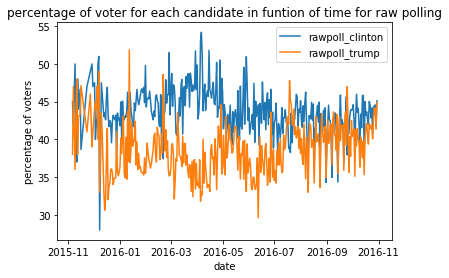

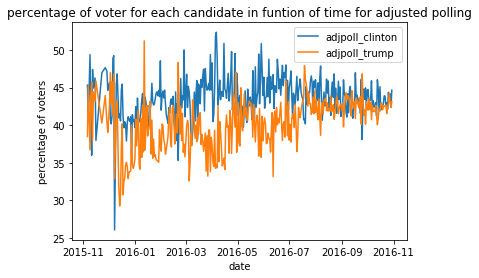

In [111]:
ind_us = voter_df['state'] == 'U.S.'
voter_us_df = voter_df.loc[ind_us]
voter_us_df['date'] = pd.to_datetime(voter_us_df['startdate'], format='%m/%d/%Y').dt.date

# Raw poll results
ax = voter_us_df[['date', 'rawpoll_clinton', 'rawpoll_trump']].groupby('date').mean().plot()

ax.set_xlabel('date')
ax.set_ylabel('percentage of voters')
ax.set_title('percentage of voter for each candidate in funtion of time for raw polling')

# Adjusted poll results
ax = voter_us_df[['date', 'adjpoll_clinton', 'adjpoll_trump']].groupby('date').mean().plot()

ax.set_xlabel('date')
ax.set_ylabel('percentage of voters')
ax.set_title('percentage of voter for each candidate in funtion of time for adjusted polling')

plt.show()

We can see here, that as we approach of the elections, the general tendency to vote for Trump has increased compare to the one of Clinton (slightly decreased and then stayed almost constant). This can be explained by the fact that Trump made up the electors from the other candidates.

## 5. Cleaning the datasets

In order to use the dataset, we first have to clean it. For this purpose, we will study, and select only certain row according to the following criteriae :
* First, we suppose that only the english tweet will be used. Indeed, as the disinformation is supposed to be done in USA, it is relevant to keep only the tweet that have been posted in english.
* Second, Donald Trump has been elected officially the 19th of december 2016. As the primary to these elections have begun on february the same year, it can be relevant to keep an interval of one year before the elections date.
* Thirdly, some tweets are posted in one sentence, delimited by capital letters. In this case, the one word sentences have to be separated to help the research in a easier manner. However, alle the tweets can be posted with capital letters, so, for easier computations, it is more relevant to cast them in only lowercase sentences.

### 5.1. Kaggle dataset

In [11]:
# Keep only english tweets
english_df = kaggle_df[kaggle_df['language'].astype(str).str.contains('English')]
english_df.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,1.674084e+09,GAB1ALDANA,People are too toxic. I think I have people po...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2150,RETWEET,Hashtager,0,1,HashtagGamer
1,1.674084e+09,GAB1ALDANA,#NowPlaying Don't Shoot (I'm a Man) by @DEVO -...,United States,English,7/30/2016 20:15,7/30/2016 20:15,3395,2014,2146,RETWEET,Hashtager,0,1,HashtagGamer
2,1.674084e+09,GAB1ALDANA,the 'I'm the most boring person in the world' ...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2159,RETWEET,Hashtager,0,1,HashtagGamer
4,1.674084e+09,GAB1ALDANA,#MyAchillesHeel Boring narcissists.....nothing...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2013,2158,RETWEET,Hashtager,0,1,HashtagGamer
5,1.674084e+09,GAB1ALDANA,Your opinion on Hillary really matters to a no...,United States,English,7/30/2016 20:16,7/30/2016 20:16,3395,2014,2154,RETWEET,Hashtager,0,1,HashtagGamer


In [12]:
# Keep only interesting time interval
start_date = '11/8/2015 00:00'
end_date = '11/8/2016 23:59'

print('Previous time interval is : {} -> {}'.format(english_df['publish_date'].min(), \
                                                    english_df['publish_date'].max()))

old_N = english_df.shape[0]

english_df = english_df[english_df['publish_date'] <= end_date]
english_df = english_df[english_df['publish_date'] >= start_date]

print('New time interval is : {} -> {}'.format(english_df['publish_date'].min(), \
                                               english_df['publish_date'].max()))
new_N = english_df.shape[0]
print('{} % of the dataframe have been kept'.format(float(new_N)/float(old_N)*100))

Previous time interval is : 1/1/2013 16:16 -> 9/9/2017 7:26
New time interval is : 11/8/2015 0:00 -> 11/8/2016 23:59
0.26764203981 % of the dataframe have been kept


In [13]:
# Separate one word sentences and cast it to lowercase characters
#english_df['content'] = english_df.apply(lambda x : (' '.join(re.sub( r"([A-Z])", r" \1", x['content']).split())).lower(), axis=1)
#english_df['content'] = english_df.apply(lambda x : x['content'].lower(), axis=1)
#english_df.head()
# Only cast it to lowercase characters
english_df['content'] = english_df.apply(lambda x : str(x['content']).lower(), axis=1)
english_df.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
2358,1.504356e+09,GALLOWAYELIANA,'@mybatonrouge watch a video recap from lsu's ...,United States,English,11/8/2015 23:57,11/8/2015 23:57,724,294,797,NaN,left,0,0,LeftTroll
6157,1.660771e+09,GARRETTSIMPSON_,"saeb erekat admits that #palestine"" is a troja...",United States,English,11/8/2016 15:18,11/8/2016 15:18,1339,1584,2256,RETWEET,Right,0,1,RightTroll
6158,1.660771e+09,GARRETTSIMPSON_,wikileaks: no link between trump & russia no l...,United States,English,11/8/2016 15:18,11/8/2016 15:19,1339,1584,2260,RETWEET,Right,0,1,RightTroll
6159,1.660771e+09,GARRETTSIMPSON_,'@downbyseashore @tbobcat9 @r4randall1 ahh...,United States,English,11/8/2016 15:18,11/8/2016 15:18,1339,1584,2259,RETWEET,Right,0,1,RightTroll
6160,1.660771e+09,GARRETTSIMPSON_,may kek watch over you and ride onward with yo...,United States,English,11/8/2016 15:18,11/8/2016 15:18,1339,1584,2258,RETWEET,Right,0,1,RightTroll


In [19]:
english_df.loc[english_df['post_type'].isnull(),'retweet'].sum()

0

In [16]:
english_df.loc[english_df['post_type'] == ,'retweet'].sum()

0

### 5.2 Twitter dataset

In [41]:
# Select only english tweets
english_new_df = new_df.loc[new_df['tweet_language'] == 'en']
english_new_df.head()

,tweetid,userid,tweet_language,tweet_time,tweet_text,in_reply_to_tweetid,is_retweet,retweet_count
8,567357519547207680,2b0d7525bed1df5119b7956f9be4888b45686172d68006...,en,2015-02-16 16:19,"As sun and cloud give way to moon and shadow, ...",NaN,False,0.0
10,493894187079974912,be1e8e099e93fe0964c1184173f038c7413def3baf38ef...,en,2014-07-28 23:02,"Down in the comfort of strangers, I...",NaN,False,0.0
11,493688319902220288,be1e8e099e93fe0964c1184173f038c7413def3baf38ef...,en,2014-07-28 09:24,Im laughing more than i should #USA,NaN,False,0.0
12,497543470211678209,be1e8e099e93fe0964c1184173f038c7413def3baf38ef...,en,2014-08-08 00:43,"No, I'm not saying I'm sorry",NaN,False,0.0
32,500956712657223680,004c1875a5f3a8ddfd2044b857a81c5d458882ac5cdf67...,en,2014-08-17 10:46,Laugh it all off in your face,NaN,False,0.0


In [47]:
# Keep only interesting time interval
start_date = '2015-11-08 00:00'
end_date = '2016-11-08 23:59'

print('Previous time interval is : {} -> {}'.format(new_df['tweet_time'].min(), \
                                                    new_df['tweet_time'].max()))

old_N = new_df.shape[0]

english_new_df = english_new_df[english_new_df['tweet_time'] <= end_date]
english_new_df = english_new_df[english_new_df['tweet_time'] >= start_date]

print('New time interval is : {} -> {}'.format(english_new_df['tweet_time'].min(), \
                                               english_new_df['tweet_time'].max()))
new_N = english_new_df.shape[0]
print('{} % of the dataframe have been kept'.format(float(new_N)/float(old_N)*100))

Previous time interval is : 2009-05-09 15:59 -> 2018-06-21 14:32
New time interval is : 2015-11-08 00:01 -> 2016-11-08 23:59
8.89732989961 % of the dataframe have been kept


In [48]:
# Only cast it to lowercase characters
english_new_df['tweet_text'] = english_new_df.apply(lambda x : str(x['tweet_text']).lower(), axis=1)
english_new_df.head()

,tweetid,userid,tweet_language,tweet_time,tweet_text,in_reply_to_tweetid,is_retweet,retweet_count
103,784084336307863552,8e58ab0f46d273103d9e71aa92cdaffb6e330ec7d15ae5...,en,2016-10-06 17:34,rt @herobright2: @unhumanrights nigeria cries ...,NaN,True,0.0
104,703231561299136512,8e58ab0f46d273103d9e71aa92cdaffb6e330ec7d15ae5...,en,2016-02-26 14:54,rt @74c5eb30de3d6691e150879ee8528463c70b0feaef...,NaN,True,0.0
110,681897201761697792,2882331822,en,2015-12-29 17:58,muslims can't even coexist with muslims why do...,NaN,False,610.0
112,668044460224188416,2882331822,en,2015-11-21 12:33,and who will determine what exactly is #offens...,NaN,False,12.0
115,728636801242566657,2882331822,en,2016-05-06 17:25,you know that fat girls who believe in #bodyac...,NaN,False,34.0


## 6. Analysis part

### 6.1. Scandale research

As seen in the introduction, we have seen different scandale in which we are interested. Therefore, we will study the following hashtags or keywords :
* Hillary Clinton's Email scandale : ['hillary' 'mail'] or ['clinton' 'mail']
* Hillary Clinton's malaise : ['hillary' 'malaise'] or ['hillary' 'faint'] or ['clinton' 'malaise'] or ['clinton' 'faint']
* Hillary insulting Trump's voter : ['hillary' 'insult' 'trump' 'elector'] or ['hillary' 'insult' 'trump' 'elector']
* Pizzagate scandale : ['pizzagate']
* Donald Trump's bankruptcy : '[trump' 'bankruptcy'] or ['donald' 'bankruptcy']
* Donald Trump's taxes : ['trump' 'taxe'] or ['donald' 'taxe']
* Donald Trump's sexist tape : ['trump' 'sexist' 'tape'] or ['donald' 'sexist' 'tape']
* Donald Trump insulting the army chief's father : ['trump' 'army' 'father'] or ['trump' 'khan'] or ['donald' 'army' 'father'] or ['donald' 'khan']

To see the impact of each scandale, we will look for different results :
* Time on which all the quote tweet were published (distribution in time)
* Showing the 10 most active user that tweeted something about him during the time period
* For the 10 most viral tweets, show how the number of retweet evolved in function off the time
* The number of tweets corresponding to the each account category
* TBD

#### 6.1.1 Kaggle dataset

In [284]:
def analyze_scandale_kaggle(dataframe, keywords) :
    scandale_df = dataframe.copy()
    for keyword in keywords :
        scandale_df = scandale_df[scandale_df['content'].astype(str).str.contains(keyword)]

    #scandale_df.shape
    if scandale_df.shape[0] != 0 :
        scandale_df['date'] = pd.to_datetime(scandale_df['publish_date'], format='%m/%d/%Y %H:%M').dt.week
        time_evolution = scandale_df[['date', 'content']].groupby('date').count()
        time_evolution.plot.bar()
        #plt.show()
    else :
        print('No text containing the following keywords : {}'.format(keywords))
        
    #return(time_evolution)

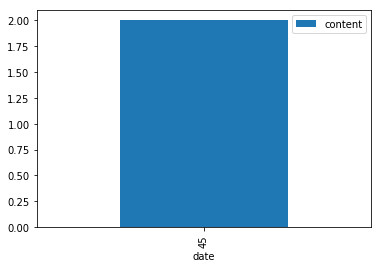

In [303]:
keywords = ['pizzagate']

analyze_scandale_kaggle(english_df, keywords)

In [43]:
"""quote_tweet_df = english_df[english_df['retweet'] == 0]
retweet_df = english_df[english_df['retweet'] == 1]

keywords = ['pizzagate']

scandale_quote_df = quote_tweet_df.copy()
for keyword in keywords :
    scandale_quote_df = scandale_quote_df[scandale_quote_df['content'].astype(str).str.contains(keyword)]

scandale_quote_df['content'].unique().shape


scandale_retweet_df = retweet_df.copy()
for keyword in keywords :
    scandale_retweet_df = scandale_retweet_df[scandale_retweet_df['content'].astype(str).str.contains(keyword)]

scandale_retweet_df['content'].unique().shape"""

"quote_tweet_df = english_df[english_df['retweet'] == 0]\nretweet_df = english_df[english_df['retweet'] == 1]\n\nkeywords = ['pizzagate']\n\nscandale_quote_df = quote_tweet_df.copy()\nfor keyword in keywords :\n    scandale_quote_df = scandale_quote_df[scandale_quote_df['content'].astype(str).str.contains(keyword)]\n\nscandale_quote_df['content'].unique().shape\n\n\nscandale_retweet_df = retweet_df.copy()\nfor keyword in keywords :\n    scandale_retweet_df = scandale_retweet_df[scandale_retweet_df['content'].astype(str).str.contains(keyword)]\n\nscandale_retweet_df['content'].unique().shape"

#### 6.1.2 Twitter dataset

In [269]:
def analyze_scandale(dataframe, keywords) :
    scandale_df = dataframe.copy()
    for keyword in keywords :
        scandale_df = scandale_df[scandale_df['tweet_text'].astype(str).str.contains(keyword)]

    #scandale_df.shape
    if scandale_df.shape[0] != 0 :
        scandale_df['date'] = pd.to_datetime(scandale_df['tweet_time'], format='%Y/%m/%d %H:%M').dt.week
        time_evolution = scandale_df[['date', 'tweet_text']].groupby('date').count()
        time_evolution.plot.bar()
        #plt.show()
    else :
        print('No text containing the following keywords : {}'.format(keywords))
        
    #return(time_evolution)

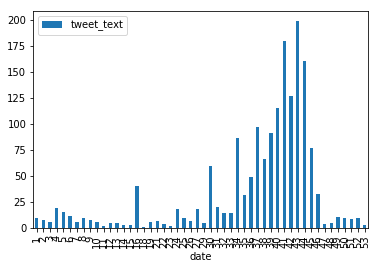

In [272]:
keywords = ['hillary', 'mail']

analyze_scandale(english_new_df, keywords)

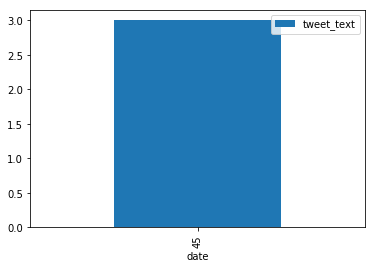

In [304]:
keywords = ['pizzagate']

analyze_scandale(english_new_df, keywords)

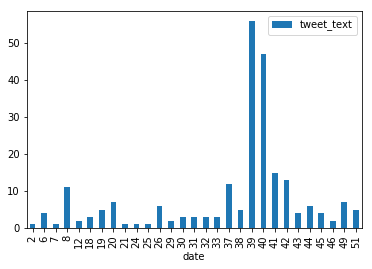

In [274]:
keywords = ['trump', 'taxes']
analyze_scandale(english_new_df, keywords)

In [275]:
keywords = ['clinton', 'malaise']
analyze_scandale(english_new_df, keywords)

No text containing the following keywords : ['clinton', 'malaise']


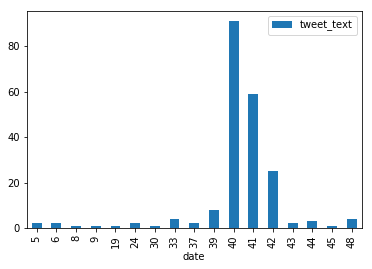

In [276]:
keywords = ['trump', 'tape']
analyze_scandale(english_new_df, keywords)